## This notebook shows how to open HDF5 data files (produced in DD4Hep), and plot hit distributions. Includes a map of the index within the  file to the variables of interest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

import h5py as h5

from IPython.display import display_html 

In [2]:
#Prints Map of Index to Variable in the H5 File
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("color", 'black')])]    # the color value can not be None

df1 = pd.DataFrame({'Hit E':[0],'Hit X':[1],'Hit Y':[2],'Hit Z':[3]},index=['Index'])
df2 = pd.DataFrame({'mcPDG':[0], 'mcSimulatorStatus':[1], 'mcGeneratorStatus':[2],'mcPX':[3],
                    'mcPY':[4],'mcPZ':[5],'mcMass':[6],'mcPT':[7],'mcP':[8],'mcTheta':[9]},index=['Index'])
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('[Calorimeter Hit]')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('[Truth Particle]')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

[Calorimeter Hit] 
 
 
   
 Hit E 
 Hit X 
 Hit Y 
 Hit Z 
 
 
 
 
 Index 
 0 
 1 
 2 
 3 
 
 
 

 
 [Truth Particle] 
 
 
   
 mcPDG 
 mcSimulatorStatus 
 mcGeneratorStatus 
 mcPX 
 mcPY 
 mcPZ 
 mcMass 
 mcPT 
 mcP 
 mcTheta 
 
 
 
 
 Index 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9

## Get data

In [4]:
filename = 'rec_piplus_Energy_0-100GeV_new.hdf5'
filename = 'rec_pionplus_vartheta.hdf5'
h5_file = h5.File(filename,'r')
print(list(h5_file.keys()))

ecal = h5_file['ecal']
hcal = h5_file['hcal']
mc = h5_file['mc']

print(hcal.shape)
print(hcal.chunks) #important for TF batch_size

['ecal', 'hcal', 'mc']
(9000, 4, 1583)
(100, 4, 1583)


In [5]:
hcal_E = hcal[:,0]
hcal_X = hcal[:,1]
hcal_Y = hcal[:,2]
hcal_Z = hcal[:,3]

ecal_E = ecal[:,0]
ecal_X = ecal[:,1]
ecal_Y = ecal[:,2]
ecal_Z = ecal[:,3]
#NOTE: This pulls everything into memory.
#This is OK for small files, but the benefit
#Of hdf5 is the ability to slice the file,
#just as you would a numpy array.

In [6]:
print(np.shape(hcal_E))
print(hcal_E[0])

(9000, 1583)
[0.43945312 0.6225586  0.6164551  ...        nan        nan        nan]


Text(0.5, 0, 'Number of Hits')

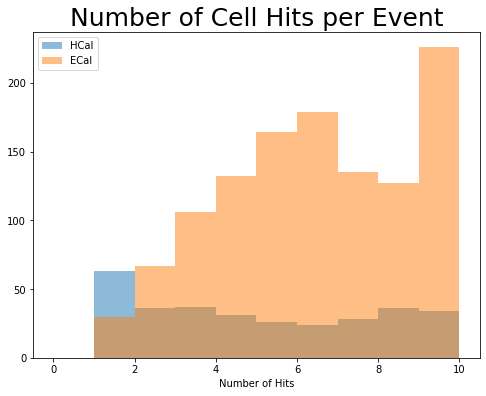

In [7]:
#fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=False,sharey=False)
fig = plt.figure(figsize=(8,6))
plt.title("Number of Cell Hits per Event",fontsize=25)
count_binning = np.linspace(0,10,11)
plt.hist(np.count_nonzero(~np.isnan(hcal_E),axis=1),bins=count_binning,alpha=0.5,label='HCal')
plt.hist(np.count_nonzero(~np.isnan(ecal_E),axis=1),bins=count_binning,alpha=0.5,label='ECal')
plt.legend()
plt.xlabel("Number of Hits")

In [8]:
counts = np.count_nonzero(~np.isnan(hcal_E),axis=1)
print(counts)
mask = counts<2
print(np.where(mask==True))

[ 50 183 179 ...  63 203  63]
(array([ 102,  231,  305,  600,  720,  886, 1299, 1367, 1599, 1621, 1676,
       1851, 2026, 2034, 2243, 2375, 2513, 2552, 2811, 2934, 3194, 3278,
       3496, 3574, 3580, 3791, 3861, 3898, 4241, 4402, 4424, 4663, 4753,
       4795, 4814, 4950, 4970, 4997, 5010, 5076, 5257, 5388, 5592, 5945,
       5989, 6023, 6348, 6678, 6710, 6760, 6925, 6927, 7208, 7243, 7326,
       7501, 7753, 7887, 8088, 8210, 8449, 8486, 8657]),)


## Hit postion distributions

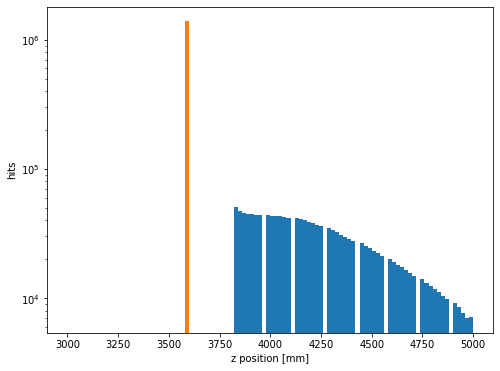

In [9]:
E_index = 0

fig = plt.figure( figsize=(8, 6))

#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60)
#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60)
plt.hist(hcal_Z.flatten(),bins=100, range=(3000,5000),label='HCAL')
plt.hist(ecal_Z.flatten(),bins=100, range=(3000,5000),label='ECAL')
#plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.position.z']),bins=100,range=(3000,5000), label='ECAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.show()

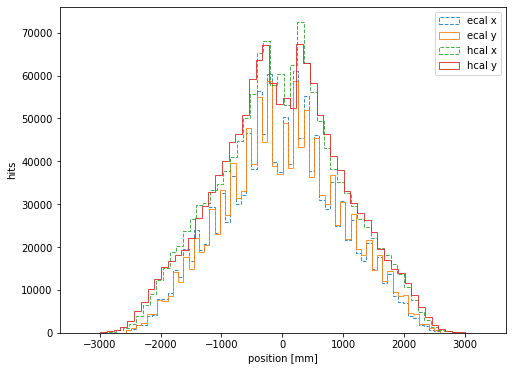

In [10]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ecal_X.flatten(),bins=60,label='ecal x',alpha=0.85,histtype='step',linestyle="--")
plt.hist(ecal_Y.flatten(),bins=60, label='ecal y',alpha=0.85,histtype='step')
plt.hist(hcal_X.flatten(),bins=60,label='hcal x',alpha=0.85,histtype='step',linestyle="--")
plt.hist(hcal_Y.flatten(),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

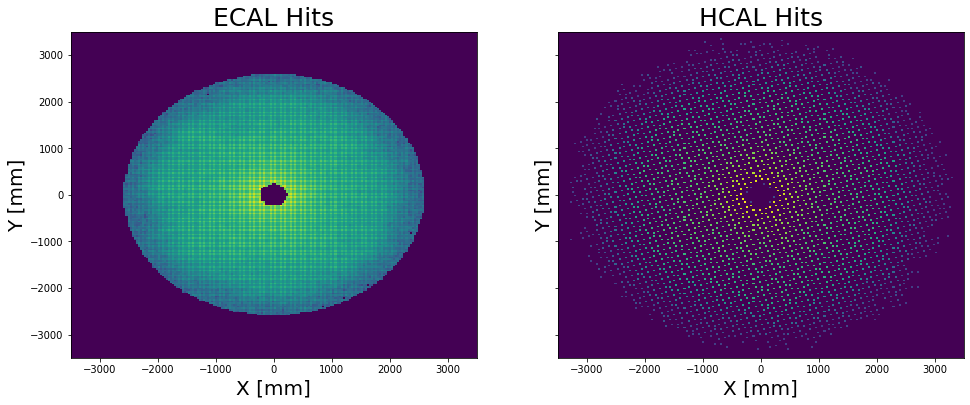

In [11]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ecal_X.flatten()
y = ecal_Y.flatten()
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))
plt.yticks(fontsize=20)
plt.xticks(fontsize=10)

x = hcal_X.flatten()
y = hcal_Y.flatten()
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))

ax[1].set_xlabel("X [mm]",fontsize=20)
ax[1].set_ylabel("Y [mm]",fontsize=20)
ax[1].set_title('HCAL Hits',fontsize=25)
ax[0].set_title('ECAL Hits',fontsize=25)
ax[0].set_xlabel("X [mm]",fontsize=20)
ax[0].set_ylabel("Y [mm]",fontsize=20)

#plt.show()
plt.savefig("cal_XY.pdf")

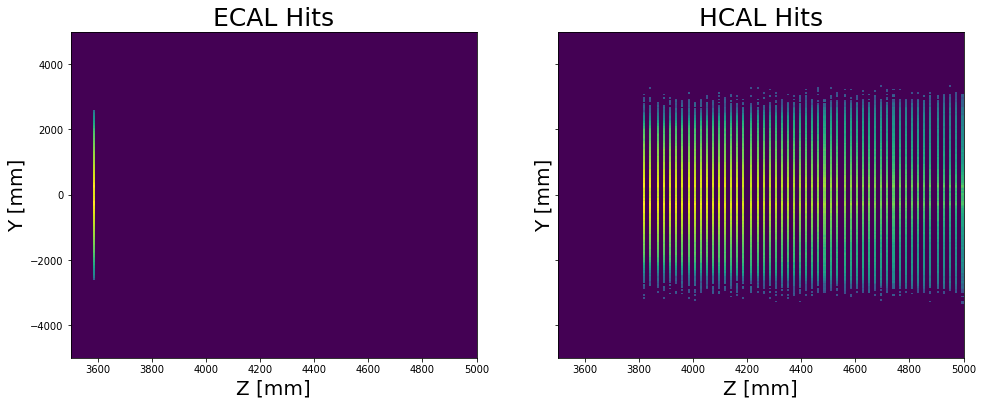

In [12]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
z = ecal_Z.flatten()
y = ecal_Y.flatten()
ax[0].hist2d(np.array(z),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

z = hcal_Z.flatten()
y = hcal_Y.flatten()
ax[1].hist2d(np.array(z),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('Z [mm]',fontsize=20)
ax[1].set_xlabel('Z [mm]',fontsize=20)
ax[0].set_ylabel('Y [mm]',fontsize=20)
ax[1].set_ylabel('Y [mm]',fontsize=20)

ax[1].set_title('HCAL Hits',fontsize=25)
ax[0].set_title('ECAL Hits',fontsize=25)

plt.savefig("cal_YZ.pdf")

## Hit energy distributions

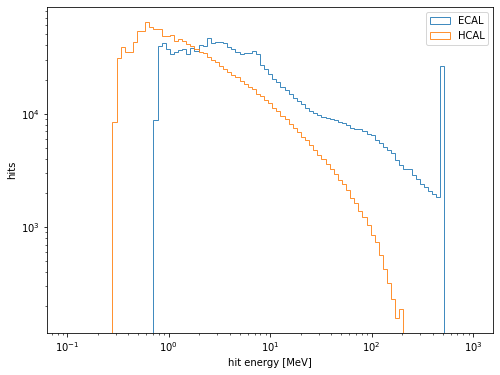

In [13]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ecal_E.flatten(),bins=np.geomspace(0.1,1000,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(hcal_E.flatten(),bins=np.geomspace(0.1,1000,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [14]:
print(np.mean(ecal_E.flatten()))

nan


In [15]:
HCALhits = hcal_E
print(np.shape(hcal_E))
HCAL_total = np.nansum(HCALhits,axis=-1)
HCAL_average = np.nanmean(HCALhits,axis=-1)
HCAL_nhits = np.zeros(np.shape(hcal_E)[0])
for i,event in enumerate(hcal_E):
    HCAL_nhits[i] = np.sum(~np.isnan(event))

print('total HCAL energy' , HCAL_total)
print('Average hit energy in HCAL' , HCAL_average)


ECALhits = ecal_E
ECAL_total = np.nansum(ECALhits,axis=-1)
ECAL_average = np.nanmean(ECALhits,axis=-1)
ECAL_nhits = np.zeros(np.shape(hcal_E)[0])
for i,event in enumerate(ecal_E):
    ECAL_nhits[i] = np.sum(~np.isnan(event))

print('total ECAL energy[MeV]' , ECAL_total)
print('Average hit energy in ECAL [MeV]' , ECAL_average)

(9000, 1583)
total HCAL energy [ 62.091064 753.4668   970.8313   ... 602.52686  881.7566   130.57251 ]
Average hit energy in HCAL [1.2418213 4.117305  5.4236383 ... 9.563918  4.3436284 2.0725796]
total ECAL energy[MeV] [ 4005.371  10499.954   6966.079  ...   282.7301  3578.5674  1762.9547]
Average hit energy in ECAL [MeV] [47.68299  30.70162  29.26924  ... 18.848673 19.034933 15.882475]


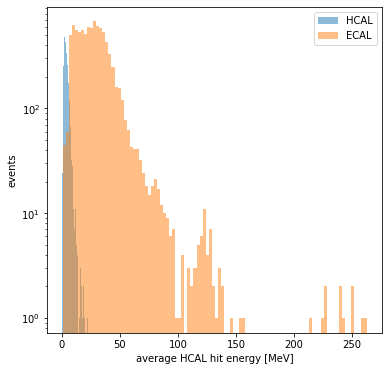

In [16]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_average,bins=100,alpha=0.5,label='HCAL')
plt.hist(ECAL_average,bins=100,alpha=0.5,label='ECAL')

plt.xlabel('average HCAL hit energy [MeV]')
plt.ylabel('events')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


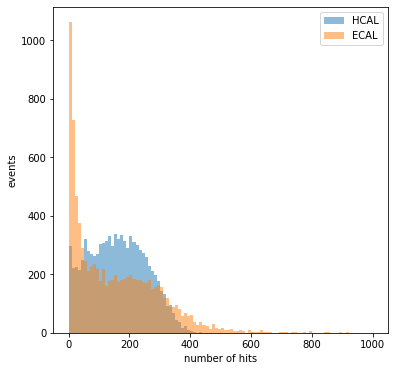

In [17]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='HCAL')
plt.hist(ECAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='ECAL')

plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [18]:
px = mc[:,3]
py = mc[:,4]
pz = mc[:,5]
mass = mc[:,6]
gen_theta = mc[:,9]

p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

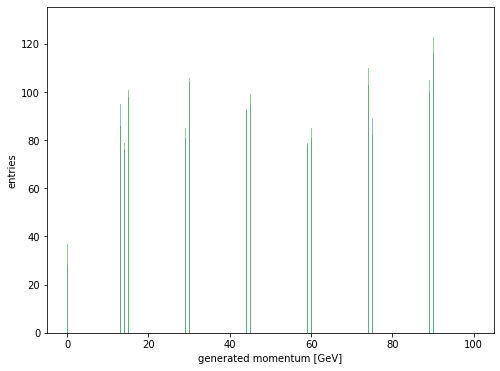

9000


In [19]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

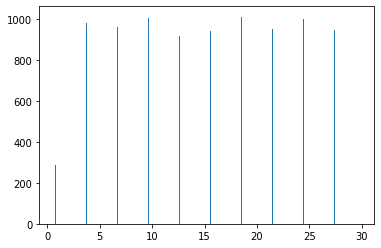

In [21]:
_ = plt.hist(gen_theta)